In [240]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from uncertainties import ufloat

data_B= "Efecto_hall.xlsx"
data_B = pd.read_excel(data_B)
print(data_B)

   I(A)  B(mt)  Sigma_I  Sigma_B
0   0.2   60.9     0.01      0.1
1   0.4  109.2     0.01      0.1
2   0.6  157.1     0.01      0.1
3   0.8  199.2     0.01      0.1
4   0.1   38.2     0.01      0.1
5   0.3   86.2     0.01      0.1
6   0.5  132.6     0.01      0.1
7   0.7  180.8     0.01      0.1


Slope: 233.6428570967005 ± 2.6727184502363057
Intercept: 15.385714304353995 ± 1.349656666033062
Residuals: 0   -1.214286
1    0.357143
2    1.528571
3   -3.100000
4   -0.550000
5    0.721429
6    0.392857
7    1.864286
dtype: float64


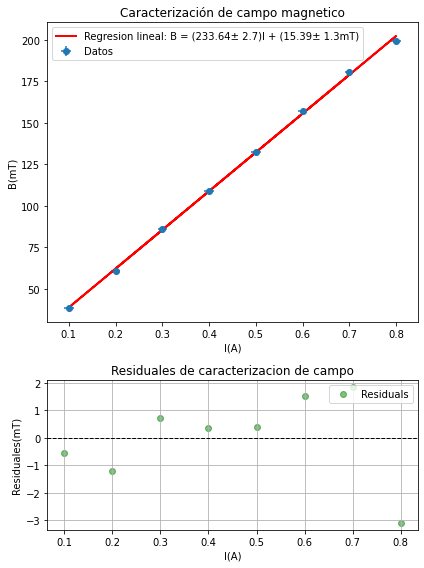

In [427]:

# Define the linear function for curve fitting
def linear_function(X, a, b):
    return a * X + b

# Perform the curve fitting
popt, pcov = curve_fit(linear_function, data_B['I(A)'], data_B['B(mt)'])

# Get the slope and intercept
slope = popt[0]
intercept = popt[1]

# Get the standard errors for the parameters
slope_std_err = np.sqrt(pcov[0, 0])
intercept_std_err = np.sqrt(pcov[1, 1])

## Setting variables
x= data_B['I(A)']
y= data_B['B(mt)']
yerr = data_B["Sigma_B"]
xerr = data_B['Sigma_I']

# Predict the Y values
Y_pred = linear_function(x, *popt)

# Calculate residuals
residuals = y - Y_pred

print(f"Slope: {slope} ± {slope_std_err}")
print(f"Intercept: {intercept} ± {intercept_std_err}")
print(f"Residuals: {residuals}")


# Create a figure with two subplots
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(6,8),gridspec_kw={'height_ratios': [2, 1]})  # 2 rows, 1 column, width = 10 inches, height = 10 inches

# Plot the regression line
ax1.errorbar(x, y, yerr, xerr,  fmt='o', label='Datos')
ax1.plot(x, Y_pred, color='red', linewidth=2, label=f'Regresion lineal: B = ({slope:.2f}± {slope_std_err:.1f})I + ({intercept:.2f}± {intercept_std_err:.1f}mT)')

ax1.set_xlabel('I(A)')
ax1.set_ylabel('B(mT)')
ax1.legend(loc='upper left')
ax1.set_title('Caracterización de campo magnetico')
#Plot residuals
ax2.scatter(x, residuals, color='green', alpha=0.5, label='Residuals')
ax2.axhline(0, color='black', linewidth=1, linestyle='--')
ax2.set_xlabel('I(A)')
ax2.set_ylabel('Residuales(mT)')
ax2.legend(loc='upper right')
ax2.set_title('Residuales de caracterizacion de campo')

plt.tight_layout()
plt.grid()

# Save the figure as a PDF file
plt.savefig('Caracterizacion_De_Campos.jpeg', format='jpeg')
plt.show()



In [124]:
data_Vh_P_1= "Efecto_hall.xlsx"
data_Vh_P_1= pd.read_excel(data_Vh_P_1,sheet_name=1) ##ESTA ES TIPO N
print(data_Vh_P_1)

   I_p(a)     VH1     VH2     VH3     VH4     VH5  Sigma_I  SigmaV        B
0  -0.030  0.0340  0.0248  0.0201  0.0153  0.0279    0.001  0.0001  202.292
1  -0.020  0.0227  0.0162  0.0129  0.0095  0.0177    0.001  0.0001  155.564
2  -0.010  0.0107  0.0072  0.0067  0.0044  0.0089    0.001  0.0001  132.200
3  -0.005  0.0057  0.0035  0.0027  0.0016  0.0048    0.001  0.0001  108.836
4   0.000  0.0000 -0.0002 -0.0003 -0.0007 -0.0003    0.001  0.0001  178.928
5   0.005 -0.0068 -0.0057 -0.0050 -0.0043 -0.0061    0.001  0.0001      NaN
6   0.010 -0.0122 -0.0098 -0.0084 -0.0065 -0.0101    0.001  0.0001      NaN
7   0.020 -0.0237 -0.0182 -0.0151 -0.0123 -0.0196    0.001  0.0001      NaN
8   0.030 -0.0342 -0.0255 -0.0218 -0.0177 -0.0291    0.001  0.0001      NaN
9     NaN  0.8000  0.6000  0.5000  0.4000  0.7000      NaN     NaN      NaN


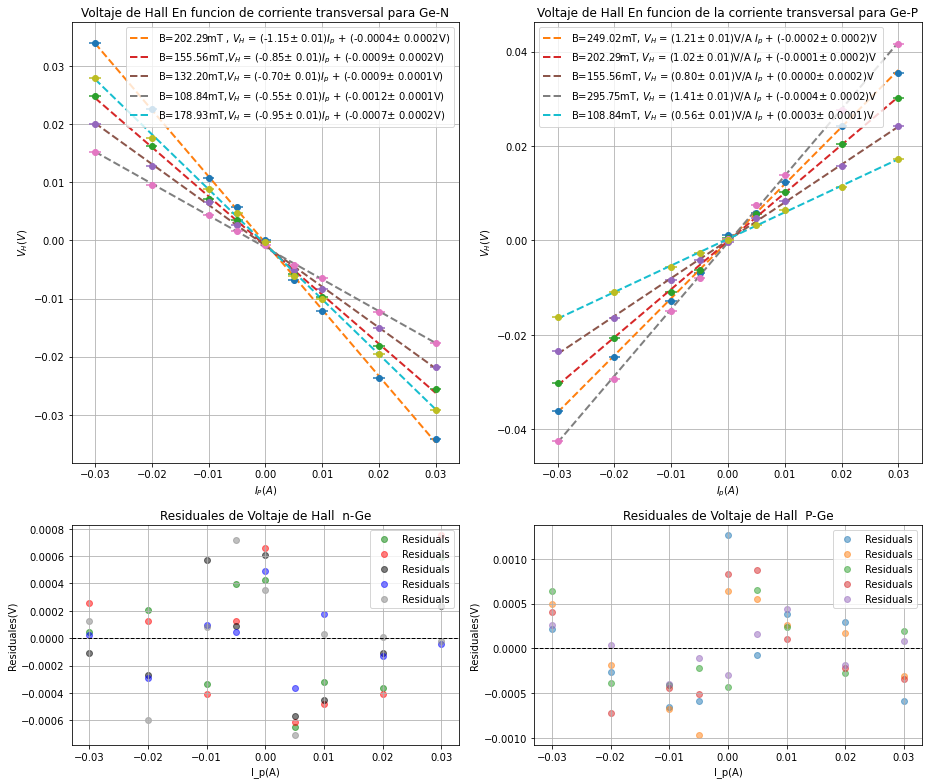

In [446]:

popt1, pcov1 = curve_fit(linear_function, data_Vh_P_1['I_p(a)'][:-1],data_Vh_P_1['VH1'][:-1])
popt2, pcov2 = curve_fit(linear_function, data_Vh_P_1['I_p(a)'][:-1],data_Vh_P_1['VH2'][:-1])
popt3, pcov3 = curve_fit(linear_function, data_Vh_P_1['I_p(a)'][:-1],data_Vh_P_1['VH3'][:-1])
popt4, pcov4 = curve_fit(linear_function, data_Vh_P_1['I_p(a)'][:-1],data_Vh_P_1['VH4'][:-1])
popt5, pcov5 = curve_fit(linear_function, data_Vh_P_1['I_p(a)'][:-1],data_Vh_P_1['VH5'][:-1])
# Get the slope and intercept
slope1 = popt1[0]
intercept1 = popt1[1]
slope2 = popt2[0]
intercept2 = popt2[1]
slope3 = popt3[0]
intercept3 = popt3[1]
slope4 = popt4[0]
intercept4 = popt4[1]
slope5 = popt5[0]
intercept5 = popt5[1]

# Get the standard errors for the parameters
slope_std_err1 = np.sqrt(pcov1[0, 0])
intercept_std_err1 = np.sqrt(pcov1[1, 1])
slope_std_err2 = np.sqrt(pcov2[0, 0])
intercept_std_err2 = np.sqrt(pcov2[1, 1])
slope_std_err3 = np.sqrt(pcov3[0, 0])
intercept_std_err3 = np.sqrt(pcov3[1, 1])
slope_std_err4 = np.sqrt(pcov4[0, 0])
intercept_std_err4 = np.sqrt(pcov4[1, 1])
slope_std_err5 = np.sqrt(pcov5[0, 0])
intercept_std_err5 = np.sqrt(pcov5[1, 1])


## Setting variables
x=data_Vh_P_1['I_p(a)'][:-1]
y1= data_Vh_P_1['VH1'][:-1]
y2= data_Vh_P_1['VH2'][:-1]
y3= data_Vh_P_1['VH3'][:-1]
y4= data_Vh_P_1['VH4'][:-1]
y5= data_Vh_P_1['VH5'][:-1]

yerr = data_Vh_P_1['Sigma_I'][:-1]
xerr = data_Vh_P_1['SigmaV'][:-1]

# Predict the Y values
Y_pred1 = linear_function(x, *popt1)
Y_pred2 = linear_function(x, *popt2)
Y_pred3 = linear_function(x, *popt3)
Y_pred4 = linear_function(x, *popt4)
Y_pred5 = linear_function(x, *popt5)



# Calculate residuals
residuals1 = y1 - Y_pred1
residuals2 = y2 - Y_pred2
residuals3 = y3 - Y_pred3
residuals4 = y4 - Y_pred4
residuals5 = y5 - Y_pred5

# Create a figure with two subplots
fig1, ((ax3,ax6),(res1,res2)) = plt.subplots(2,2,figsize=(13,11),gridspec_kw={'height_ratios': [2, 1]}) # 2 rows, 1 column, width = 10 inches, height = 10 inches

# Plot the regression line
ax3.errorbar(x, y1, xerr, yerr,  fmt='o')
ax3.plot(x, Y_pred1, linewidth=2, label=f'B={data_Vh_P_1["B"][0]:.2f}mT , $V_H$ = ({slope1:.2f}± {slope_std_err1:.2f})$I_p$ + ({intercept1:.4f}± {intercept_std_err1:.4f}V)',ls="--")
ax3.errorbar(x, y2, xerr, yerr,  fmt='o')
ax3.plot(x, Y_pred2,linewidth=2,  label=f'B={data_Vh_P_1["B"][1]:.2f}mT,$V_H$ = ({slope2:.2f}± {slope_std_err2:.2f})$I_p$ + ({intercept2:.4f}± {intercept_std_err2:.4f}V)',ls="--")
ax3.errorbar(x, y3, xerr, yerr,  fmt='o')
ax3.plot(x, Y_pred3,linewidth=2,  label=f'B={data_Vh_P_1["B"][2]:.2f}mT,$V_H$ = ({slope3:.2f}± {slope_std_err3:.2f})$I_p$ + ({intercept3:.4f}± {intercept_std_err3:.4f}V)',ls="--")
ax3.errorbar(x, y4, xerr, yerr,  fmt='o')
ax3.plot(x, Y_pred4, linewidth=2,  label=f'B={data_Vh_P_1["B"][3]:.2f}mT,$V_H$ = ({slope4:.2f}± {slope_std_err4:.2f})$I_p$ + ({intercept4:.4f}± {intercept_std_err4:.4f}V)',ls="--")
ax3.errorbar(x, y5, xerr, yerr,  fmt='o')
ax3.plot(x, Y_pred5,  linewidth=2,label=f'B={data_Vh_P_1["B"][4]:.2f}mT,$V_H$ = ({slope5:.2f}± {slope_std_err5:.2f})$I_p$ + ({intercept5:.4f}± {intercept_std_err5:.4f}V)',ls="--")


ax3.set_xlabel('$I_P(A)$')
ax3.set_ylabel('$V_H(V)$')
ax3.legend(loc='upper right')
ax3.set_title('Voltaje de Hall En funcion de corriente transversal para Ge-N')
ax3.grid()
VHS_PB=[data_VP_B["VH1"],data_VP_B["VH2"],data_VP_B["VH3"],data_VP_B["VH4"],data_VP_B["VH5"]]
slopes_P_B=[]
deviation_P_B=[]


y_preds_P_B=[]
x=data_VP_B['IP(ma)'][:-1]*10**-3
yerr = [0.0001]*9
xerr = [0.001]*9



for it in range(5) :
    popt, pcov = curve_fit(linear_function,x,VHS_PB[it][:-1])
    y_preds_P_B.append(linear_function(x, *popt))
    slope = popt[0]
    slopes_P_B.append(slope)
    deviation_P_B.append(np.sqrt(pcov[0, 0]))
    intercept = popt[1]
    ax6.errorbar(x, VHS_PB[it][:-1], yerr, xerr,  fmt='o')
    ax6.plot(x, y_preds_P_B[it], linewidth=2, label=f'B={data_VP_B["B"][it]:.2f}mT, $V_H$ = ({slopes_P_B[it]:.2f}± {deviation_P_B[it]:.2f})V/A $I_p$ + ({intercept:.4f}± {np.sqrt(pcov[1, 1]):.4f})V',ls="--")
    
    residuales_P_B=VHS_PB[it][:-1]-y_preds_P_B[it]
    res2.scatter(x, residuales_P_B, alpha=0.5, label='Residuals')

ax6.set_xlabel('$I_p(A)$')
ax6.set_ylabel('$V_H(V)$')
ax6.legend(loc='upper left')
ax6.set_title('Voltaje de Hall En funcion de la corriente transversal para Ge-P')
plt.tight_layout()
ax6.grid()




res1.scatter(x, residuals1, color='green', alpha=0.5, label='Residuals')
res1.scatter(x, residuals2, color='r', alpha=0.5, label='Residuals')
res1.scatter(x, residuals3, color='k', alpha=0.5, label='Residuals')
res1.scatter(x, residuals4, color='b', alpha=0.5, label='Residuals')
res1.scatter(x, residuals5, color='gray', alpha=0.5, label='Residuals')
res1.axhline(0, color='black', linewidth=1, linestyle='--')
res1.set_xlabel('I_p(A)')
res1.set_ylabel('Residuales(V)')
res1.legend(loc='upper right')
res1.set_title('Residuales de Voltaje de Hall  n-Ge')
res1.grid()

res2.axhline(0, color='black', linewidth=1, linestyle='--')
res2.set_xlabel('I_p(A)')
res2.set_ylabel('Residuales(V)')
res2.legend(loc='upper right')
res2.set_title('Residuales de Voltaje de Hall  P-Ge')
res2.grid()

plt.tight_layout()


# Save the figure as a PDF file
plt.savefig('V_Hall_Bcte_np.jpeg', format='png')
plt.show()


In [343]:
slopes=[slope1,slope2,slope3,slope4,slope5]
slope_std_errs=[slope_std_err1,slope_std_err2,slope_std_err3,slope_std_err4,slope_std_err5]
RH_1_N=[]
sigma_RH1_N=[]
w=10e-3
for i in range(5):
    RH_1_N.append((slopes[i]*w)/(data_Vh_P_1["B"][i]*10e-3))
    sigma_RH1_N.append(w/(data_Vh_P_1["B"][i]*10e-3) *slope_std_errs[i])
    


RHNB=ufloat(np.mean(RH_1_N),np.std(RH_1_N)/np.sqrt(len(RH_1_N)))
print(RHNB)

n=1/(-1.60217663*10**-19 * RHNB)
print(n)

print(RH_1_N)

-0.00535+/-0.00009
(1.166+/-0.020)e+21
[-0.005664037498493183, -0.00544256168935322, -0.005325530164205465, -0.005043803230828513, -0.005295671217747491]


In [322]:
data_Vh_P_2= "Efecto_hall.xlsx"
data_Vh_P_2= pd.read_excel(data_Vh_P_2,sheet_name=2)  ##ESTA ES ENREALIDAD TIPO N
print(data_Vh_P_2)

   I_P      VH1      VH2      VH3      VH4      VH5        B     VT1     VT2  \
0  1.2   0.0387   0.0164  -0.0164  -0.0306  -0.0493  295.748  -0.837  -0.466   
1    1   0.0340   0.0138  -0.0144  -0.0267  -0.0415  249.020  -0.831  -0.463   
2  0.6   0.0238   0.0081  -0.0098  -0.0174  -0.0294  155.564  -0.826  -0.460   
3  0.3   0.0148   0.0029  -0.0059  -0.0103  -0.0151   85.472  -0.824  -0.458   
4 -0.3  -0.0069  -0.0085   0.0030   0.0084   0.0165  -54.712  -0.823  -0.457   
5 -0.6  -0.0151  -0.0130   0.0063   0.0150   0.0242 -124.804  -0.825  -0.457   
6   -1  -0.0261  -0.0190   0.0116   0.0247   0.0390 -218.260  -0.830  -0.459   
7 -1.2  -0.0315  -0.0221   0.0134   0.0291   0.0464 -264.988  -0.832  -0.460   
8  I_B -20.0000 -10.0000  10.0000  20.0000  30.0000      NaN -20.000 -10.000   

      VT3     VT4     VT5  
0   0.359   0.708   1.111  
1   0.359   0.705   1.106  
2   0.358   0.702   1.100  
3   0.357   0.701   1.097  
4   0.359   0.701   1.097  
5   0.360   0.702   1.099  
6  

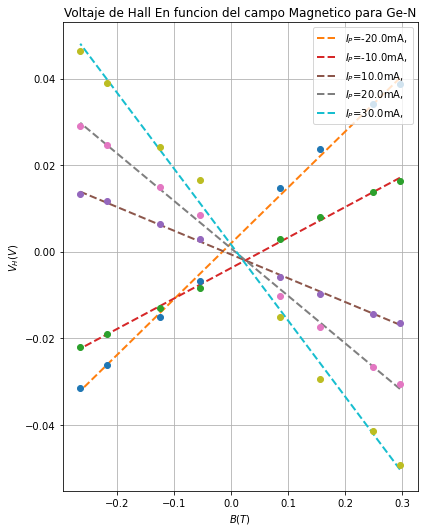

In [327]:
VHS_P=[data_Vh_P_2["VH1"],data_Vh_P_2["VH2"],data_Vh_P_2["VH3"],data_Vh_P_2["VH4"],data_Vh_P_2["VH5"]]
slopes_Ip=[]
deviation_Ip=[]
y_preds_IP=[]
x=data_Vh_P_2['B'][:-1]*10**-3
yerr = [0.0001]*8
xerr = [2.7*10**-3]*8

fig2, ax5 = plt.subplots(figsize=(6,7.5)) 

for it in range(5) :
    popt, pcov = curve_fit(linear_function,x,VHS_P[it][:-1])
    y_preds_IP.append(linear_function(x, *popt))
    slope = popt[0]
    slopes_Ip.append(slope)
    deviation_Ip.append(np.sqrt(pcov[0,0]))
    intercept = popt[1]
    ax5.errorbar(x, VHS_P[it][:-1], yerr, xerr,  fmt='o')
    ax5.plot(x, y_preds_IP[it], linewidth=2, label=f'$I_P$={VHS_P[it][8]}mA, ',ls="--")
    

ax5.set_xlabel('$B(T)$')
ax5.set_ylabel('$V_H(V)$')
ax5.legend(loc='upper right')
ax5.set_title('Voltaje de Hall En funcion del campo Magnetico para Ge-N')
plt.tight_layout()
ax5.grid()

# Save the figure as a PDF file
plt.savefig('V_Hall_Icte_N.jpeg', format='png')
plt.show()

In [333]:
RH_2_N=[]
sigma_RH2_N=[]
w=10e-3
for i in range(5):
    RH_2_N.append((slopes_Ip[i]*w)/(VHS_P[i][8]*10e-3))
    sigma_RH2_N.append(w/(VHS_P[i][8]*10e-3) *deviation_Ip[i])
    


RHNI=ufloat(np.mean(RH_2_N) ,np.std(RH_2_N)/np.sqrt(len(RH_2_N)))

n_=1/(-1.60217663*10**-19 * RHNI)
print(n_)

print( RHNI)
print(RH_2_N)

RHNP=(RHNI+RHNB)/2
print(RHNP)

print((n+n_)/2)


(1.03+/-0.05)e+21
-0.00606+/-0.00027
[-0.0064493832821200265, -0.007040672396953216, -0.005486363251328284, -0.005483031001742527, -0.00584945500209634]
-0.00571+/-0.00014
(1.098+/-0.025)e+21


In [309]:
slopes_Ip[0]

-0.12898766563825312

In [149]:
data_= "Efecto_hall.xlsx"
data_VP_B= pd.read_excel(data_,sheet_name=3)
print(data_VP_B)


     IP(ma)     VH1     VH2     VH3     VH4      VH5  Sigma_I  SigmaV        B
0       -30 -0.0362 -0.0302 -0.0234 -0.0424 -0.01630    0.001  0.0001  249.020
1       -20 -0.0246 -0.0207 -0.0164 -0.0294 -0.01090    0.001  0.0001  202.292
2       -10 -0.0129 -0.0110 -0.0084 -0.0150 -0.00570    0.001  0.0001  155.564
3        -5 -0.0068 -0.0062 -0.0042 -0.0080 -0.00260    0.001  0.0001  295.748
4         0  0.0011  0.0005 -0.0004  0.0004  0.00003    0.001  0.0001  108.836
5         5  0.0058  0.0055  0.0047  0.0075  0.00330    0.001  0.0001      NaN
6        10  0.0123  0.0103  0.0083  0.0138  0.00640    0.001  0.0001      NaN
7        20  0.0243  0.0204  0.0158  0.0276  0.01140    0.001  0.0001      NaN
8        30  0.0355  0.0301  0.0243  0.0416  0.01730    0.001  0.0001      NaN
9  I_bobina  1.0000  0.8000  0.6000  1.2000  0.40000      NaN     NaN      NaN


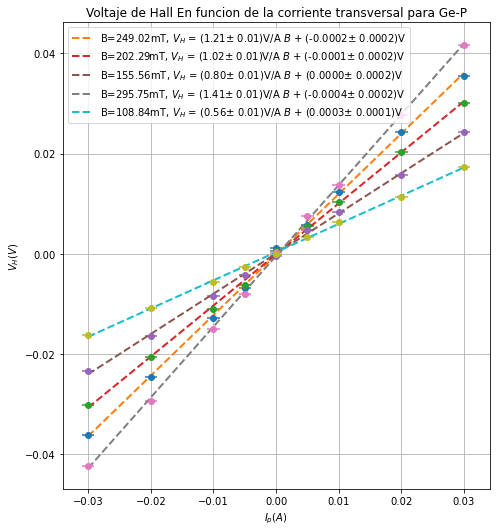

In [237]:
VHS_PB=[data_VP_B["VH1"],data_VP_B["VH2"],data_VP_B["VH3"],data_VP_B["VH4"],data_VP_B["VH5"]]
slopes_P_B=[]
deviation_P_B=[]


y_preds_P_B=[]
x=data_VP_B['IP(ma)'][:-1]*10**-3
yerr = [0.0001]*9
xerr = [0.001]*9

fig3, ax6 = plt.subplots(figsize=(7,7.5)) 

for it in range(5) :
    popt, pcov = curve_fit(linear_function,x,VHS_PB[it][:-1])
    y_preds_P_B.append(linear_function(x, *popt))
    slope = popt[0]
    slopes_P_B.append(slope)
    deviation_P_B.append(np.sqrt(pcov[0, 0]))
    intercept = popt[1]
    ax6.errorbar(x, VHS_PB[it][:-1], yerr, xerr,  fmt='o')
    ax6.plot(x, y_preds_P_B[it], linewidth=2, label=f'B={data_VP_B["B"][it]:.2f}mT, $V_H$ = ({slopes_P_B[it]:.2f}± {deviation_P_B[it]:.2f})V/A $B$ + ({intercept:.4f}± {np.sqrt(pcov[1, 1]):.4f})V',ls="--")
    

ax6.set_xlabel('$I_p(A)$')
ax6.set_ylabel('$V_H(V)$')
ax6.legend(loc='upper left')
ax6.set_title('Voltaje de Hall En funcion de la corriente transversal para Ge-P')
plt.tight_layout()
ax6.grid()

# Save the figure as a PDF file
plt.savefig('V_Hall_Bcte_P.jpeg', format='png')
plt.show()

In [345]:
RH_1_P=[]
sigma_RH1_P=[]
w=10e-3
for i in range(5):
    RH_1_P.append((slopes_P_B[i]*w)/(data_VP_B["B"][i]*10e-3))
    sigma_RH1_P.append(w/(data_VP_B["B"][i]*10e-3) *deviation_P_B[i])
    


RHPB=ufloat(np.mean(RH_1_P),np.std(RH_1_P)/np.sqrt(len(RH_1_P)))

p=1/(1.60217663*10**-19 * RHPB)
print(p)

print( RHPB)


(1.249+/-0.018)e+21
0.00500+/-0.00007


In [174]:
data_VPI= pd.read_excel(data_,sheet_name=4)
print(data_VPI)

    I_B         B      VH1     VH2     VH3     VH4     VH5  IP(ma)    VT1  \
0 -1.34 -297.6976 -0.04230 -0.0269 -0.0116  0.0153  0.0263    30.0  0.997   
1 -1.10 -241.6240 -0.03670 -0.0230 -0.0097  0.0130  0.0221    20.0  0.990   
2 -0.80 -171.5320 -0.02780 -0.0167 -0.0072  0.0100  0.0169    10.0  0.981   
3 -0.40  -78.0760 -0.01420 -0.0081 -0.0032  0.0056  0.0120   -10.0  0.971   
4  0.00   15.3800  0.00003  0.0020  0.0009  0.0008  0.0016   -20.0  0.967   
5  0.40  108.8360  0.01600  0.0119  0.0052 -0.0044 -0.0098     NaN  0.977   
6  0.80  202.2920  0.02920  0.0211  0.0090 -0.0091 -0.0203     NaN  0.980   
7  1.00  249.0200  0.03550  0.0248  0.0108 -0.0118 -0.0251     NaN  0.986   
8  1.20  295.7480  0.04150  0.0283  0.0126 -0.0137 -0.0299     NaN  0.993   

      VT2    VT3    VT4     VT5  
0  0.7020  0.323 -0.546 -0.9990  
1  0.6950  0.319 -0.541 -0.9960  
2  0.6870  0.317 -0.536 -0.0992  
3  0.0679  0.314 -0.534 -0.0997  
4  0.6520  0.313 -0.450 -0.9990  
5  0.0654  0.314 -0.449 -

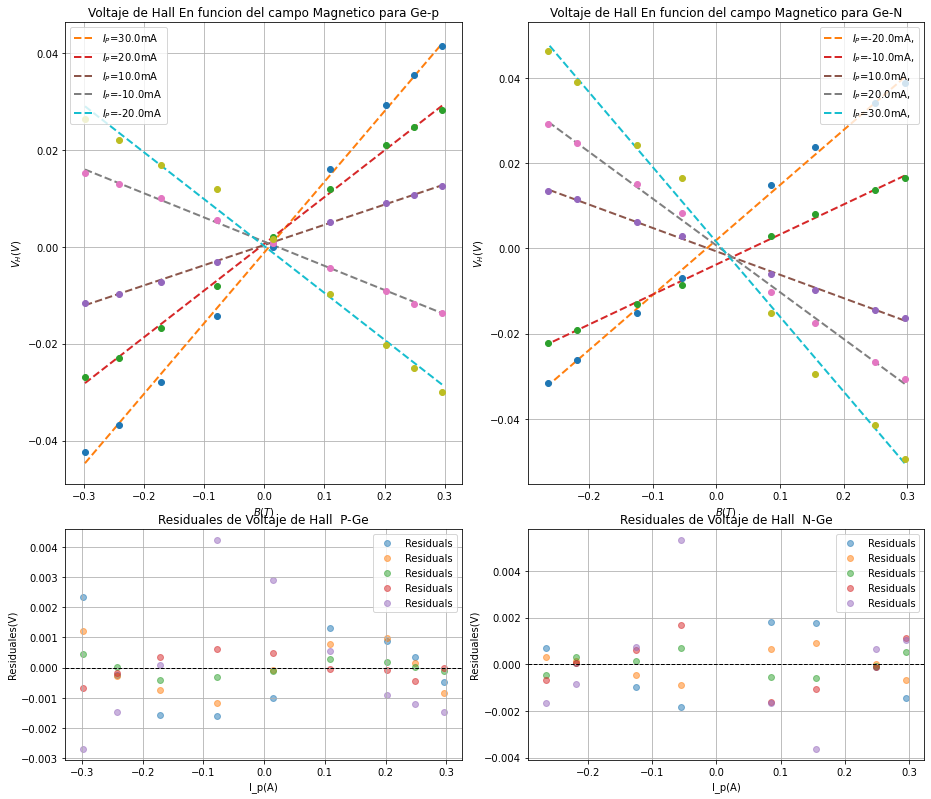

In [454]:
VHS_PI=[data_VPI["VH1"],data_VPI["VH2"],data_VPI["VH3"],data_VPI["VH4"],data_VPI["VH5"]]
slopes_PI=[]
deviation_PI=[]
y_preds_PI=[]
x=data_VPI['B']*10**-3
yerr = [0.0001]*9
xerr = [2.7*10**-3]*9

fig2,((ax7,ax8) ,(res3,res4))= plt.subplots(2,2,figsize=(13,11),gridspec_kw={'height_ratios': [2, 1]}) 

for it in range(5) :
    popt, pcov = curve_fit(linear_function,x,VHS_PI[it])
    y_preds_PI.append(linear_function(x, *popt))
    slope = popt[0]
    slopes_PI.append(slope)
    deviation_PI.append(np.sqrt(pcov[0,0]))
    intercept = popt[1]
    ax7.errorbar(x, VHS_PI[it], yerr, xerr,  fmt='o')
    ax7.plot(x, y_preds_PI[it], linewidth=2, label=f'$I_P$={data_VPI["IP(ma)"][it]}mA',ls="--")
    residualesPI=VHS_PI[it]-y_preds_PI[it]
    res3.scatter(x, residualesPI, alpha=0.5, label='Residuals')
    

ax7.set_xlabel('$B(T)$')
ax7.set_ylabel('$V_H(V)$')
ax7.legend(loc='upper left')
ax7.set_title('Voltaje de Hall En funcion del campo Magnetico para Ge-p')
plt.tight_layout()
ax7.grid()


VHS_P=[data_Vh_P_2["VH1"],data_Vh_P_2["VH2"],data_Vh_P_2["VH3"],data_Vh_P_2["VH4"],data_Vh_P_2["VH5"]]
slopes_Ip=[]
deviation_Ip=[]
y_preds_IP=[]
x=data_Vh_P_2['B'][:-1]*10**-3
yerr = [0.0001]*8
xerr = [2.7*10**-3]*8



for it in range(5) :
    popt, pcov = curve_fit(linear_function,x,VHS_P[it][:-1])
    y_preds_IP.append(linear_function(x, *popt))
    slope = popt[0]
    slopes_Ip.append(slope)
    intercept = popt[1]
    ax8.errorbar(x, VHS_P[it][:-1], yerr, xerr,  fmt='o')
    ax8.plot(x, y_preds_IP[it], linewidth=2, label=f'$I_P$={VHS_P[it][8]}mA, ',ls="--")
    residualesIP=VHS_P[it][:-1]-y_preds_IP[it]
    res4.scatter(x, residualesIP, alpha=0.5, label='Residuals')
    

ax8.set_xlabel('$B(T)$')
ax8.set_ylabel('$V_H(V)$')
ax8.legend(loc='upper right')
ax8.set_title('Voltaje de Hall En funcion del campo Magnetico para Ge-N')
plt.tight_layout()
ax8.grid()


res3.axhline(0, color='black', linewidth=1, linestyle='--')
res3.set_xlabel('I_p(A)')
res3.set_ylabel('Residuales(V)')
res3.legend(loc='upper right')
res3.set_title('Residuales de Voltaje de Hall  P-Ge')
res3.grid()


res4.axhline(0, color='black', linewidth=1, linestyle='--')
res4.set_xlabel('I_p(A)')
res4.set_ylabel('Residuales(V)')
res4.legend(loc='upper right')
res4.set_title('Residuales de Voltaje de Hall  N-Ge')
res4.grid()



# Save the figure as a PDF file
plt.savefig('V_Hall_Icte_PN.jpeg', format='png')
plt.show()

In [294]:
RH_2_P=[]
sigma_RH2_P=[]
w=10e-3
for i in range(5):
    RH_2_P.append((slopes_PI[i]*w)/(data_VPI["IP(ma)"][i]*10e-3))
    sigma_RH2_P.append(w/(data_VPI["IP(ma)"][i]*10e-3) *deviation_PI[i])
    


RHPI=ufloat(np.mean(RH_2_P),np.std(RH_2_P)/np.sqrt(len(RH_2_P)))
p_=1/(RHPI*1.60217663*10**-19)

print(RHPI)
print(RH_2_P)


RHPP=np.mean([RHPI,RHPB])
pp=0.5*(p+p_)

print(pp)
print(RHPP)

0.00474+/-0.00013
[0.004865603647987642, 0.004824869270833911, 0.004173277318492028, 0.004996234163913518, 0.0048392797240365505]
(1.283+/-0.020)e+21
0.00487+/-0.00007


In [183]:
data_= "Efecto_hall.xlsx"
data_RN=pd.read_excel(data_,sheet_name=5)
print(data_RN)


   I_bobina       B     Delta
0       1.5  365.78  0.054621
1       1.3  319.06  0.045088
2       1.2  295.70  0.026796
3       0.8  202.26  0.016732
4       0.6  155.54  0.016843


In [310]:
slopes_PI

[0.14596810943962926,
 0.09649738541667822,
 0.04173277318492028,
 -0.049962341639135176,
 -0.09678559448073101]

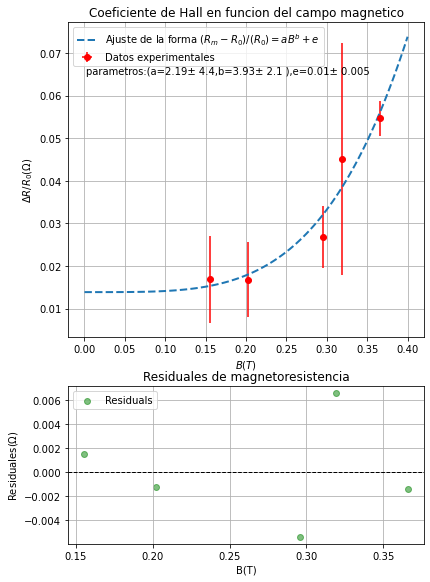

In [461]:
fig3, (ax8,res5) = plt.subplots(2,1,figsize=(6,8),gridspec_kw={'height_ratios': [2, 1]}) 
sigmaR=[0.142/34.12,0.93/34.12,0.25/34.12,0.30/34.12,0.35/34.12]

def fit_e(X,a,b,e):
    return a*X**b + e

B=data_RN["B"]*10**-3

popte, pcove = curve_fit(fit_e,B,data_RN["Delta"],maxfev=4000)
x=np.linspace(0,0.4,100)
ax8.plot(x, fit_e(x,*popte), linewidth=2, label="Ajuste de la forma $(R_m-R_0)/(R_0)=aB^b+e$",ls="--")

a=popte[0]
std_a=np.sqrt(pcove[0,0])
b=popte[1]
std_b=np.sqrt(pcove[1,1])
e=popte[2]
std_e=np.sqrt(pcove[2,2])
ax8.annotate(f'parametros:(a={a:.2f}± {std_a:.1f},b={b:.2f}± {std_b:.1f} ),e={e:.2f}± {0.005}',(0.002,0.065))
ax8.errorbar(B,data_RN["Delta"],sigmaR,[2.7*10**-3]*5,fmt="o",c="r",label="Datos experimentales")
ax8.grid()
ax8.set_xlabel('$B(T)$')
ax8.set_ylabel('$\Delta R/R_0(\Omega$)')
ax8.set_title("Coeficiente de Hall en funcion del campo magnetico")
plt.tight_layout()
ax8.legend()


Y_prede= fit_e(B, *popte)
residuale=data_RN["Delta"]-Y_prede

res5.scatter(B, residuale, color='green', alpha=0.5, label='Residuals')
res5.axhline(0, color='black', linewidth=1, linestyle='--')
res5.set_xlabel('B(T)')
res5.set_ylabel('Residuales($\Omega$)')
res5.legend(loc='upper left')
res5.set_title('Residuales de magnetoresistencia')
res5.grid()

plt.savefig('Magnetorsistencia_P.jpeg', format='jpeg')
plt.show()


In [411]:
pcove

array([[1.97315560e+01, 9.16208725e+00, 2.36309914e-02],
       [9.16208725e+00, 4.29121340e+00, 1.17275612e-02],
       [2.36309914e-02, 1.17275612e-02, 5.15030874e-05]])

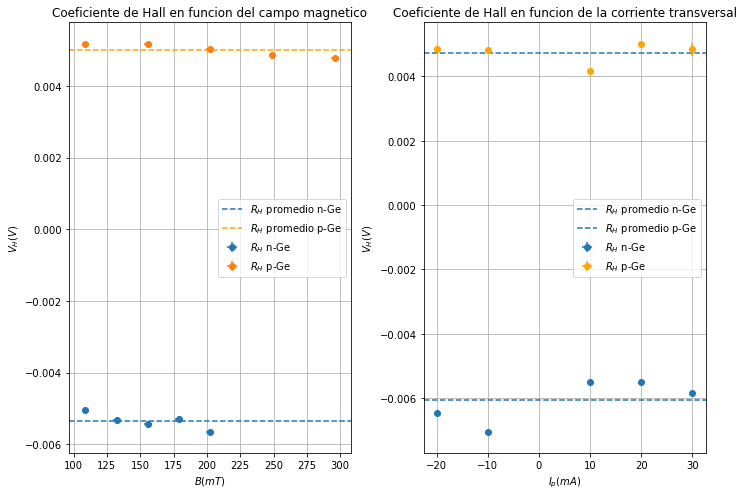

In [398]:
y1n=RH_1_N
x1n=data_Vh_P_1["B"][:5]
y2n=RH_1_P
x2n=data_VP_B["B"][:5]

y1P=RH_2_N
x1P=[-20,-10,10,20,30]
y2P=RH_2_P
x2P=[-20,-10,10,20,30]


fig4, (ax9,ax10) = plt.subplots(1,2,figsize=(10,7))

ax9.errorbar(x1n,y1n,sigma_RH1_N,[2.7]*5,fmt="o",label="$R_H$ n-Ge")
ax9.errorbar(x2n,y2n,sigma_RH1_P,[2.7]*5,fmt="o",label="$R_H$ p-Ge")
ax9.axhline(y=np.mean(y1n),ls="--",label='$R_H$ promedio n-Ge')
ax9.axhline(y=np.mean(y2n),ls="--",label='$R_H$ promedio p-Ge',c="orange")
ax9.grid()
ax9.legend()
ax9.set_xlabel('$B(mT)$')
ax9.set_ylabel('$V_H(V)$')
ax9.set_title("Coeficiente de Hall en funcion del campo magnetico")
plt.tight_layout()


ax10.errorbar(x1P,y1P,sigma_RH1_N,[0.1]*5,fmt="o",label="$R_H$ n-Ge")
ax10.errorbar(x2P,y2P,sigma_RH2_P,[0.1]*5,fmt="o",label="$R_H$ p-Ge",c="orange")
ax10.axhline(y=np.mean(y1P),ls="--",label='$R_H$ promedio n-Ge')
ax10.axhline(y=np.mean(y2P),ls="--",label='$R_H$ promedio p-Ge')
ax10.grid()
ax10.legend()
ax10.set_xlabel('$I_p(mA)$')
ax10.set_ylabel('$V_H(V)$')
ax10.set_title("Coeficiente de Hall en funcion de la corriente transversal")
plt.tight_layout()
plt.savefig('VHS.jpeg', format='jpeg')


[-0.00013168261143858698,
 -0.00012130003585313908,
 9.376123809104525e-05,
 0.0001073424681309182,
 0.00017165002234789832]